In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [3]:
# Load the transformed exoplanet data
exoplanet_data_transformed = pd.read_csv('Exoplanet_Data_Transformed.csv')

# Display the first few rows of the data
print(exoplanet_data_transformed.head())


   Orbital Period  Orbital Eccentricity  Orbital Inclination  \
0       -0.678545                   0.0             1.020934   
1       -1.190661                   0.0            -0.411630   
2        0.623544                   0.0            -0.942962   
3        0.465826                   0.0             1.045583   
4       -0.215691                   0.0             0.546996   

   Planet Radius (Earth Radii)  Planet Density  Equilibrium Temperature  \
0                    -0.662735        0.699574                 0.823102   
1                     0.085409       -0.170071                 0.147981   
2                    -0.152274        0.088400                -0.946154   
3                     0.126539       -0.212584                 0.158596   
4                     0.181013       -0.273028                 0.288411   

   Insolation Flux  Transit Depth  Transit Duration  Star Mass  ...  \
0        -0.857060      -1.015056         -0.545016   0.908903  ...   
1         1.566493    

In [4]:
# Select only numerical columns for scaling
numerical_columns = exoplanet_data_transformed.select_dtypes(include=['float64', 'int64']).columns

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(exoplanet_data_transformed[numerical_columns])

# Convert to DataFrame for easier handling
scaled_data_df = pd.DataFrame(scaled_data, columns=numerical_columns)


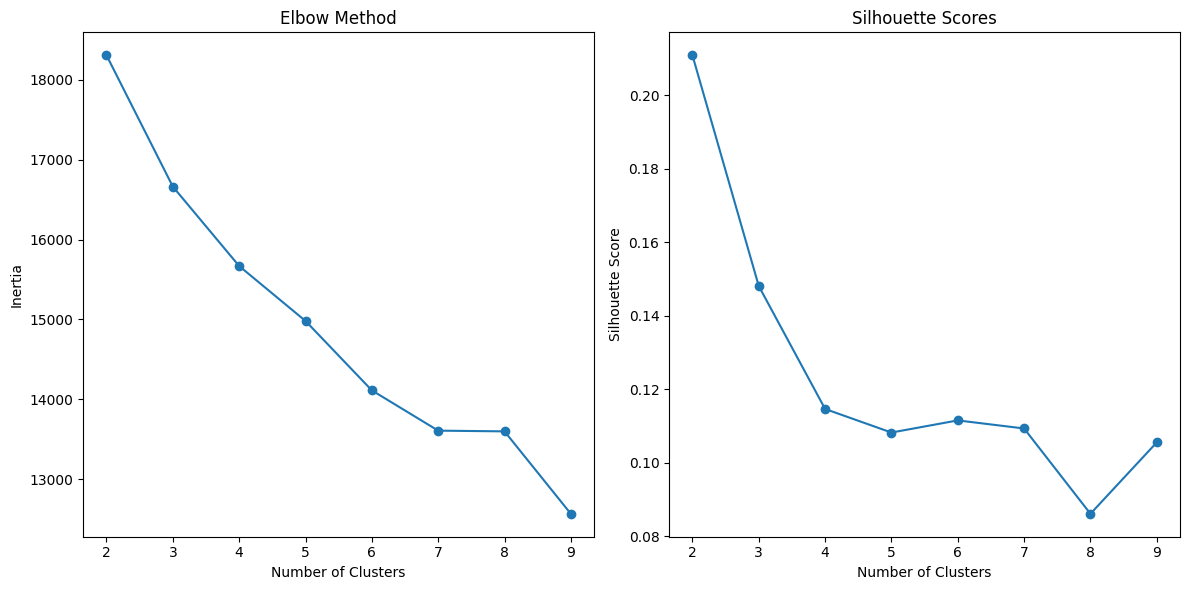

In [5]:
# Determine the optimal number of clusters using the elbow method
k_values = range(2, 10)
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plotting the elbow method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plotting silhouette scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


In [ ]:
# Choose the optimal number of clusters 
optimal_k = 4

# Fit the K-Means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original DataFrame
exoplanet_data_transformed['Cluster'] = kmeans.labels_


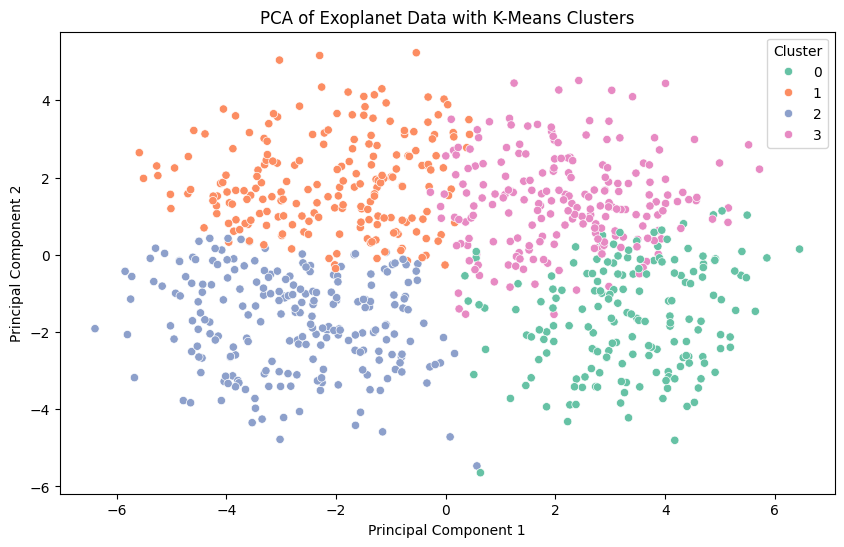

In [9]:
# Visualize the clusters using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = kmeans.labels_

# Plot the PCA results with cluster labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('PCA of Exoplanet Data with K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [10]:
# Get the cluster centers
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_columns)

# Add cluster labels to the DataFrame for easier understanding
cluster_centers['Cluster'] = range(optimal_k)

# Display the cluster centers to see how each feature contributes to each cluster
print(cluster_centers)


   Orbital Period  Orbital Eccentricity  Orbital Inclination  \
0       -0.278218             -0.035261            -0.128156   
1        0.299319              0.048049            -0.017264   
2       -0.623653              0.097045            -0.215139   
3        0.603529             -0.120076             0.350779   

   Planet Radius (Earth Radii)  Planet Density  Equilibrium Temperature  \
0                    -0.397504        0.382690                -0.299757   
1                     0.617656       -0.589113                 0.003237   
2                    -0.862543        0.843103                 0.954659   
3                     0.649183       -0.643787                -0.768353   

   Insolation Flux  Transit Depth  Transit Duration  Star Mass  ...  \
0         1.010506       0.132586         -0.772366  -1.076599  ...   
1        -0.452972       0.169625          0.528522   0.609901  ...   
2        -0.827405      -1.094259         -0.101889   0.883557  ...   
3         0.478891 

In [11]:
# Get the PCA components (loadings)
pca_loadings = pd.DataFrame(pca.components_, columns=numerical_columns)

# Display the loadings for each principal component
print(pca_loadings)


   Orbital Period  Orbital Eccentricity  Orbital Inclination  \
0        0.060861             -0.018132             0.037530   
1        0.277566             -0.006327             0.094739   

   Planet Radius (Earth Radii)  Planet Density  Equilibrium Temperature  \
0                     0.060327       -0.062489                -0.193022   
1                     0.391772       -0.372016                -0.240669   

   Insolation Flux  Transit Depth  Transit Duration  Star Mass  ...  \
0         0.228924       0.197267         -0.090558  -0.321083  ...   
1        -0.043212       0.330309          0.246586  -0.013167  ...   

   Planet Radius Error (Upper)  Planet Radius Limit  Star Mass Limit  \
0                     0.107254        -0.000000e+00             -0.0   
1                    -0.326488         3.277288e-33              0.0   

   Star Radius Error (Lower)  Star Radius Error (Upper)  Star Radius Limit  \
0                  -0.280173                   0.269654               -0

In [ ]:
# List of features to plot (excluding the 'Cluster' column)
features = ['Orbital Period', 'Orbital Eccentricity', 'Orbital Inclination',
            'Planet Radius (Earth Radii)', 'Planet Density', 'Equilibrium Temperature',
            'Insolation Flux', 'Transit Depth', 'Transit Duration', 'Star Mass',
            'Planet Radius Limit', 'Star Mass Limit', 'Star Radius Error (Lower)',
            'Star Radius Error (Upper)', 'Star Radius Limit', 'Star Age Error (Lower)',
            'Star Age Error (Upper)', 'Star Age Limit', 'Star Age (Gyr)']

# Loop over the features and create box plots
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=exoplanet_data_transformed)
    plt.title(f'Distribution of {feature} Across Clusters')
    plt.show()


In [ ]:

subset_data = exoplanet_data_transformed.iloc[[0, 1]]

# List of features to visualize
features = ['Orbital Period', 'Orbital Eccentricity', 'Orbital Inclination',
            'Planet Radius (Earth Radii)', 'Planet Density', 'Equilibrium Temperature',
            'Insolation Flux', 'Transit Depth', 'Transit Duration', 'Star Mass']

# Plot the distribution of these specific rows across clusters
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=exoplanet_data_transformed)
    plt.scatter(x=[0, 1], y=subset_data[feature], color='red', label='Selected Rows', s=100)
    plt.title(f'Distribution of {feature} Across Clusters with Selected Rows Highlighted')
    plt.legend()
    plt.show()


   Orbital Period  Orbital Eccentricity  Orbital Inclination  \
0       -0.278218             -0.035261            -0.128156   
1        0.299319              0.048049            -0.017264   
2       -0.623653              0.097045            -0.215139   
3        0.603529             -0.120076             0.350779   

   Planet Radius (Earth Radii)  Planet Density  Equilibrium Temperature  \
0                    -0.397504        0.382690                -0.299757   
1                     0.617656       -0.589113                 0.003237   
2                    -0.862543        0.843103                 0.954659   
3                     0.649183       -0.643787                -0.768353   

   Insolation Flux  Transit Depth  Transit Duration  Star Mass  ...  \
0         1.010506       0.132586         -0.772366  -1.076599  ...   
1        -0.452972       0.169625          0.528522   0.609901  ...   
2        -0.827405      -1.094259         -0.101889   0.883557  ...   
3         0.478891 

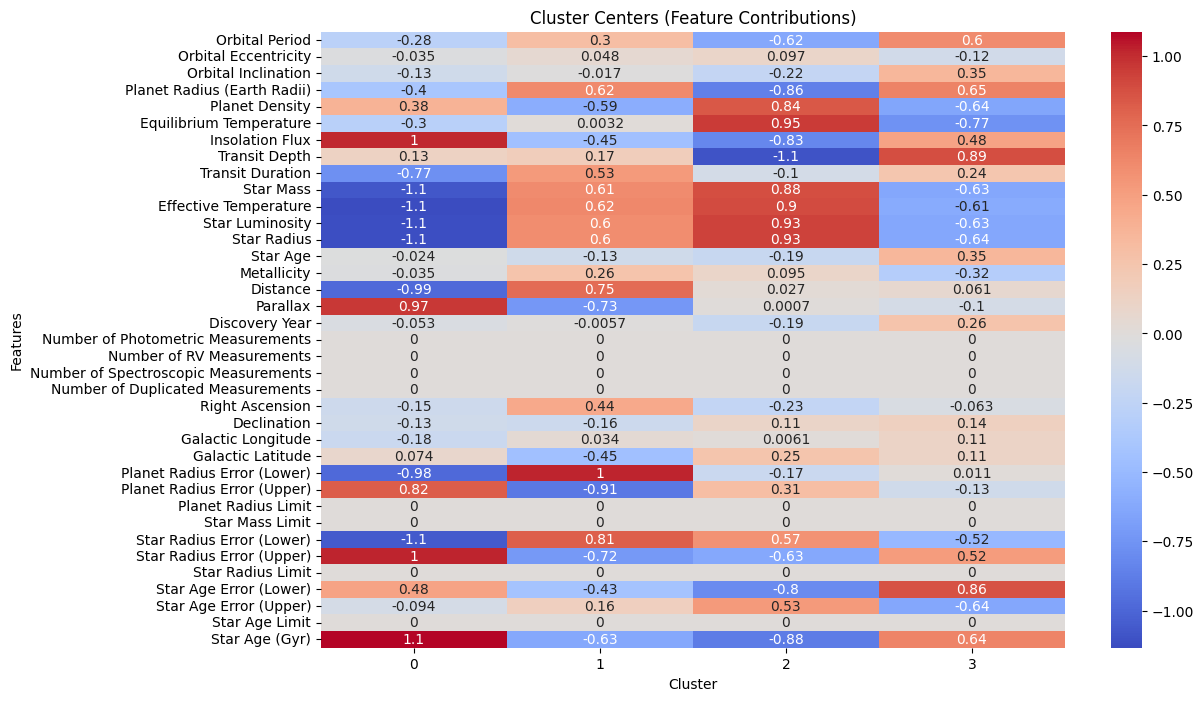

In [ ]:

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Convert cluster centers to a DataFrame for better visualization
centers_df = pd.DataFrame(cluster_centers, columns=exoplanet_data_transformed.columns[:-1]) 

# Display the cluster centers
print(centers_df)

# Plot heatmap for visualizing the cluster centers
plt.figure(figsize=(12, 8))
sns.heatmap(centers_df.T, annot=True, cmap="coolwarm")
plt.title('Cluster Centers (Feature Contributions)')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()
